哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [34]:
import pandas as pd 

In [35]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
dataA = pd.read_csv('A_lvr_land_A.csv')
dataB = pd.read_csv('B_lvr_land_A.csv')
dataE = pd.read_csv('E_lvr_land_A.csv')
dataF = pd.read_csv('F_lvr_land_A.csv')

/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
dataA = dataA.drop([0])
dataB = dataB.drop([0])
dataE = dataE.drop([0])
dataF = dataF.drop([0])


In [37]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
dataA['city'] = 'Taipei'
dataB['city'] = 'New_Taipei'
dataE['city'] = 'Taichung'
dataF['city'] = 'Kaohsiung'

In [38]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([dataA,dataB,dataE,dataF])
data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,Kaohsiung
19815,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,Kaohsiung
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,Kaohsiung
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,Kaohsiung


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [39]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [40]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
data = data.rename(columns_mapping, axis='columns')



In [41]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())

df = data[(data['main_use']=='住家用') & (data['use_zoning']=='住')]

for columns in analysis_columns:
    dd = df[columns].dropna()
    print(dd)

#    unit_price, Length: 7802

1           Taipei
2           Taipei
5           Taipei
7           Taipei
8           Taipei
           ...    
9267     Kaohsiung
9543     Kaohsiung
10078    Kaohsiung
10142    Kaohsiung
11512    Kaohsiung
Name: city, Length: 7818, dtype: object
1        文山區
2        文山區
5        文山區
7        文山區
8        文山區
        ... 
9267     三重區
9543     三重區
10078    三重區
10142    汐止區
11512    泰山區
Name: towns, Length: 7818, dtype: object
1        住家用
2        住家用
5        住家用
7        住家用
8        住家用
        ... 
9267     住家用
9543     住家用
10078    住家用
10142    住家用
11512    住家用
Name: main_use, Length: 7818, dtype: object
1        住
2        住
5        住
7        住
8        住
        ..
9267     住
9543     住
10078    住
10142    住
11512    住
Name: use_zoning, Length: 7818, dtype: object
1        36000000
2         5580000
5        18280000
7         8000000
8         2200000
           ...   
9267      7280000
9543      7350000
10078     6000000
10142    11800000
11512     9000000
Name: total_pri

In [42]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
#df.astype(columns_type).dtypes
for tab in columns_type:
    df[tab] = df[tab].astype(columns_type[tab])
    
df.dtypes

<ipython-input-42-f5b588a3c332>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tab] = df[tab].astype(columns_type[tab])


towns                          object
transaction_sign               object
house_number                   object
land_area_square_meter         object
use_zoning                     object
land_use_district              object
land_use                       object
tx_dt                          object
transaction_pen_number         object
shifting_level                 object
total_floor_number             object
building_state                 object
main_use                       object
main_materials                 object
complete_date                  object
building_area_square_meter    float64
room_number                     int64
hall_number                     int64
health_number                   int64
compartmented_number           object
manages                        object
total_price                     int64
unit_price                    float64
berth_category                 object
berth_area_square_meter        object
berth_price                    object
note        

In [43]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df['tx_dt_year'] = df['tx_dt'].apply(lambda x: x[:3]).astype('int16')

#dd = df[df['tx_dt_year']==109 & df['room_number'].isin([1,2,3,4,5]) & df['hall_number'].isin([1,2])]
dd = df[df['tx_dt_year']==109 ]
dd = dd[dd['room_number'].isin([1,2,3,4,5])  ]
dd = dd[dd['hall_number'].isin([1,2])  ]
dd.reset_index()

<ipython-input-43-a98cbbcae63c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tx_dt_year'] = df['tx_dt'].apply(lambda x: x[:3]).astype('int16')


,index,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,...,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city,tx_dt_year
0,1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,...,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei,109
1,2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,...,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei,109
2,5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,...,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei,109
3,7,文山區,房地(土地+建物),臺北市文山區木柵路四段159巷170弄1~30號,30.65,住,NaN,NaN,1090417,土地2建物1車位0,...,0.0,0,親友、員工或其他特殊關係間之交易。;,RPQNMLQLNHPFFAA08CA,90.78,11.51,12.93,NaN,Taipei,109
4,8,文山區,房地(土地+建物),臺北市文山區興隆路三段112巷4弄1~30號,9.84,住,NaN,NaN,1090417,土地1建物1車位0,...,0.0,0,親友、員工或其他特殊關係間之交易。;,RPSPMLTJOHPFFAA68CA,26.15,0.00,4.01,NaN,Taipei,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,9139,新店區,房地(土地+建物),新北市新店區中興路二段121巷1~30號,30.11,住,NaN,NaN,1090516,土地2建物1車位0,...,0.0,0,NaN,RPXNMLOLQHPFFCF96CA,93.18,0.00,9.99,NaN,Kaohsiung,109
6890,9215,蘆洲區,房地(土地+建物),新北市蘆洲區民族路1~30號,25.75,住,NaN,NaN,1090529,土地4建物1車位0,...,0.0,0,NaN,RPXTMLPKPHPFFGF87CA,86.55,0.00,5.59,NaN,Kaohsiung,109
6891,10078,三重區,房地(土地+建物),新北市三重區平安街1~30號,23.34,住,NaN,NaN,1090522,土地1建物1車位0,...,0.0,0,本案為親屬間買賣,RPPRMLSLPHPFFGF27CA,67.00,0.00,0.00,NaN,Kaohsiung,109
6892,10142,汐止區,房地(土地+建物),新北市汐止區大同路二段271~300號,9.74,住,NaN,NaN,1090507,土地1建物1車位0,...,0.0,0,NaN,RPUQMLOLPHPFFDF96CA,98.54,1.29,15.78,NaN,Kaohsiung,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [44]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

dd['building_area_square_feet'] = dd['building_area_square_meter'].apply(lambda x: x * 0.3025)

dd['main_building_area_square_feet'] = dd['main_building_area'].apply(lambda x: x * 0.3025)

dd['unit_price_square_feet'] = dd['unit_price'].apply(lambda x: x / 0.3025 )


In [45]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?

dd.describe()


#有單價為0元的資料2筆 
dd[dd['unit_price']==0.0]
dd.drop(dd[dd['unit_price'] == 0.0].index, inplace=True)
dd[dd['unit_price']==0.0]

#主建物面積 0 的資料38筆 
dd[dd['main_building_area']==0.000000]
dd.drop(dd[dd['main_building_area'] == 0.000000].index, inplace=True)
dd[dd['main_building_area']==0.000000]

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet


In [46]:
# 移除後再用.describe()觀察是否還有奇怪的資料?

dd.describe()

,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6833.000000,6833.000000,6833.000000,6833.000000,6.833000e+03,6833.000000,6833.000000,6833.000000,6833.000000,6833.0,6833.000000,6833.000000,6.833000e+03
mean,121.839043,2.850578,1.793356,1.733646,1.142856e+07,94581.407874,82.598850,4.909709,5.122385,109.0,36.856310,24.986152,3.126658e+05
std,62.882173,0.898252,0.404928,0.681088,1.163079e+07,58420.057132,36.952896,7.793120,6.075675,0.0,19.021857,11.178251,1.931242e+05
min,7.440000,1.000000,1.000000,0.000000,4.100000e+05,3239.000000,7.440000,0.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,83.070000,2.000000,2.000000,1.000000,5.600000e+06,53595.000000,61.070000,0.000000,0.000000,109.0,25.128675,18.473675,1.771736e+05
50%,109.430000,3.000000,2.000000,2.000000,8.600000e+06,79748.000000,79.140000,1.180000,3.020000,109.0,33.102575,23.939850,2.636298e+05
75%,147.540000,3.000000,2.000000,2.000000,1.330930e+07,118914.000000,95.990000,8.360000,9.490000,109.0,44.630850,29.036975,3.931041e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,109.0,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [47]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數


dataT = dd[dd['city'] == 'Taipei']

import pingouin as pg
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)

from scipy import stats

for col in dataT.columns:
    if dataT[col].dtypes == 'object': ##離散 vs 連續
        aov = pg.anova(dv='total_price', between=col, data=dataT, detailed=True)
        etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
        print(col+"====")
        print(judgment_etaSq(etaSq)) 
    else: ##連續 vs 連續
        corr, _=stats.pearsonr(dataT['total_price'], dataT[col])
        print(col+"====")
        print(corr)   
'''
#高度相關有 
離散
transaction_sign ，house_number，land_area_square_meter，land_use_district，
land_use，tx_dt，transaction_pen_number、shifting_level
total_floor_number、building_state、main_materials、complete_date
berth_area_square_meter、berth_price、serial_number、elevator

離續
building_area_square_meter、main_building_area、building_area_square_feet
main_building_area_square_feet、
'''


towns====
Medium
transaction_sign====
Large
house_number====
Large
land_area_square_meter====
Large
use_zoning====
Negligible
land_use_district====
Large
land_use====
Large
tx_dt====
Large
transaction_pen_number====
Large
shifting_level====
Large
total_floor_number====
Large
building_state====
Large
main_use====
Negligible
main_materials====
Large


/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:998: RuntimeWarning: invalid value encountered in double_scalars
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
<ipython-input-47-98dfa121df80>:24: RuntimeWarning: invalid value encountered in double_scalars
  etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:998: RuntimeWarning: invalid value encountered i

complete_date====
Large
building_area_square_meter====
0.8648621449861279
room_number====
0.32604560054489057
hall_number====
0.27035863305507324
health_number====
0.5987828048756814
compartmented_number====
Negligible
manages====
Medium
total_price====
1.0
unit_price====
0.5819403574687936
berth_category====
Medium
berth_area_square_meter====
Large
berth_price====
Large
note====
Small


/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1


serial_number====
Large
main_building_area====
0.7110551054481062
auxiliary_building_area====
0.23187558947587447
balcony_area====
0.4646161711509999
elevator====
Large
city====
Negligible
tx_dt_year====
nan
building_area_square_feet====
0.8648621449861279
main_building_area_square_feet====
0.7110551054481062
unit_price_square_feet====
0.5819403574687936


/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:998: RuntimeWarning: invalid value encountered in double_scalars
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
<ipython-input-47-98dfa121df80>:24: RuntimeWarning: invalid value encountered in double_scalars
  etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array

'\n#高度相關有 \n離散\ntransaction_sign ，house_number，land_area_square_meter，land_use_district，\nland_use，tx_dt，transaction_pen_number、shifting_level\ntotal_floor_number、building_state、main_materials、complete_date\nberth_area_square_meter、berth_price、serial_number、elevator\n\n離續\nbuilding_area_square_meter、main_building_area、building_area_square_feet\nmain_building_area_square_feet、\n'

In [48]:
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

for col in dataT.columns:
    if dataT[col].dtypes == 'object': ##離散 vs 連續
        aov = pg.anova(dv='unit_price_square_feet', between=col, data=dataT, detailed=True)
        etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
        print(col+"====")
        print(judgment_etaSq(etaSq)) 
    else: ##連續 vs 連續
        corr, _=stats.pearsonr(dataT['unit_price_square_feet'], dataT[col])
        print(col+"====")
        print(corr)   
'''
#高度相關有 
離散
towns ，house_number，land_area_square_meter，land_use_district，
land_use，tx_dt、shifting_level
berth_area_square_meter、berth_price、note、serial_number、elevator

離續
unit_price_square_feet
'''        

towns====
Large
transaction_sign====
Small
house_number====
Large
land_area_square_meter====
Large
use_zoning====
Negligible
land_use_district====
Large
land_use====
Large
tx_dt====
Large
transaction_pen_number====
Medium
shifting_level====
Large
total_floor_number====
Large
building_state====
Large
main_use====
Negligible
main_materials====
Small


/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:998: RuntimeWarning: invalid value encountered in double_scalars
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
<ipython-input-48-26e27517ad48>:6: RuntimeWarning: invalid value encountered in double_scalars
  etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:998: RuntimeWarning: invalid value encountered in

complete_date====
Large
building_area_square_meter====
0.21956594464445417
room_number====
-0.09904715761508087
hall_number====
0.006293569999745025
health_number====
0.12929871101051202
compartmented_number====
Negligible
manages====
Small
total_price====
0.5819403574687936
unit_price====
1.0
berth_category====
Small
berth_area_square_meter====
Large
berth_price====
Large
note====
Large


/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1


serial_number====
Large
main_building_area====
0.11441909952787042
auxiliary_building_area====
0.0794450811113212
balcony_area====
0.01586629370558247
elevator====
Large
city====
Negligible
tx_dt_year====
nan
building_area_square_feet====
0.21956594464445417
main_building_area_square_feet====
0.11441909952787044
unit_price_square_feet====
0.9999999999999999


/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:991: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:998: RuntimeWarning: invalid value encountered in double_scalars
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
<ipython-input-48-26e27517ad48>:6: RuntimeWarning: invalid value encountered in double_scalars
  etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:990: RuntimeWarning: invalid value encountered in double_scalars
  msbetween = ssbetween / ddof1
/Users/qqlu83/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array 

'\n#高度相關有 \n離散\ntowns ，house_number，land_area_square_meter，land_use_district，\nland_use，tx_dt、shifting_level\nberth_area_square_meter、berth_price、note、serial_number、elevator\n\n離續\nunit_price_square_feet\n'

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

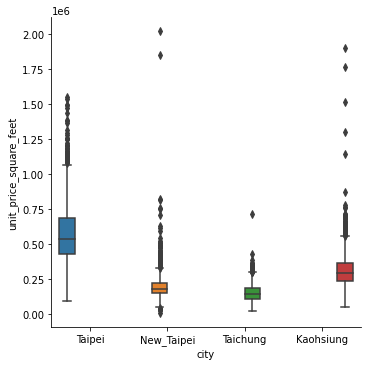

In [49]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪()中位數最高的地區
import seaborn as sns
g = sns.catplot(x="city", y="unit_price_square_feet", hue="city",
               data=dd,kind="box")
#Taipei 是單價元坪(unit_price_square_feet)中位數最高的地區

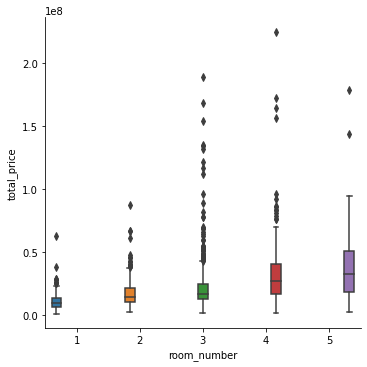

In [50]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
g = sns.catplot(x="room_number", y="total_price", hue="room_number",
               data=dataT,kind="box")

#5房是總價元(total_price)中位數最高的房間數

In [53]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataT['towns'] = labelencoder.fit_transform(dataT['towns'])

print(dataT['towns'])

print(labelencoder.inverse_transform(dataT['towns'] ))



1        9
2        9
5        9
7        9
8        9
        ..
3821    11
3829     3
4010     8
4203     2
4448     0
Name: towns, Length: 1374, dtype: int64
[9 9 9 ... 8 2 0]


<ipython-input-53-9494f1630acb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataT['towns'] = labelencoder.fit_transform(dataT['towns'])


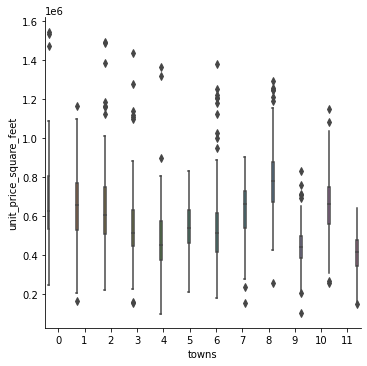

In [54]:
g = sns.catplot(x="towns", y="unit_price_square_feet", hue="towns",
               data=dataT,kind="box")

#大安區 是單價元坪(unit_price_square_feet)中位數最高的地區